# San Diego Burrito Analytics: Bootcamp 2016

15 Sept 2016

This notebook characterizes the data collected from consuming burritos from Don Carlos during Neuro bootcamp.

# Outline

1. Load data into python
    * Use a Pandas dataframe
    * View data
    * Print some metadata
2. Hypothesis tests
    * California burritos vs. Carnitas burritos
    * Don Carlos 1 vs. Don Carlos 2
    * Bonferroni correction
3. Distributions
    * Distributions  of each burrito quality
    * Tests for normal distribution
4. Correlations
    * Hunger vs. Overall rating
    * Correlation matrix
5. Assumptions discussion

# 0. Import libraries into Python

In [1]:
# These commands control inline plotting
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np # Useful numeric package
import scipy as sp # Useful statistics package
import matplotlib.pyplot as plt # Plotting package

# 1. Load data into a Pandas dataframe

In [58]:
import pandas as pd # Dataframe package
filename = './burrito_bootcamp.csv'
df = pd.read_csv(filename)

### View raw data

In [59]:
df

,Location,Burrito,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer
0,Don Carlos Taco Shop,Shredded chicken,3.0,23.5,21.50,0.86,3.0,5.0,3.00,3.5,4.0,4.0,4.0,4.0,4.0,3.80,Yes,Scott
1,Don Carlos Taco Shop,Carne asada,3.5,22.5,22.00,0.87,2.0,3.5,2.50,2.5,2.0,4.0,3.5,2.5,5.0,3.00,Yes,Scott
2,Don Carlos Taco Shop,Soyrizo,1.5,22.5,22.00,0.87,3.0,2.0,2.50,3.0,4.5,4.0,3.0,3.0,5.0,3.00,Yes,Emily
3,Don Carlos Taco Shop,Soyrizo,2.0,23.0,22.50,0.93,3.0,2.0,3.50,3.0,4.0,5.0,4.0,4.0,5.0,3.75,Yes,Ricardo
4,Don Carlos Taco Shop,Soyrizo,4.0,NaN,NaN,NaN,4.0,5.0,4.00,3.5,4.5,5.0,2.5,4.5,4.0,4.20,Yes,Scott
5,Don Carlos Taco Shop,Soyrizo,4.0,21.5,20.00,0.68,3.0,4.0,5.00,3.5,2.5,2.5,2.5,4.0,1.0,3.20,Yes,Emily
6,Don Carlos Taco Shop,Soyrizo,1.5,23.0,23.00,0.97,2.0,3.0,3.00,2.0,2.5,2.5,NaN,2.0,3.0,2.60,Yes,Scott
7,Don Carlos Taco Shop,California,4.0,21.5,20.50,0.72,2.5,3.0,3.00,2.5,3.0,3.5,NaN,2.5,3.0,3.00,Yes,Emily
8,Don Carlos Taco Shop,California,3.5,23.0,21.50,0.85,2.0,4.5,4.50,3.5,1.5,3.0,3.5,4.0,2.0,3.90,Yes,Scott
9,Don Carlos Taco Shop,California,3.5,22.0,20.80,0.76,2.5,1.5,1.50,3.0,4.5,3.0,1.5,2.0,4.5,2.00,Yes,Scott


### Brief metadata

In [60]:
print 'Number of burritos:', df.shape[0]
print 'Average burrito rating'
print 'Reviewers: '
print np.array(df['Reviewer'])

Number of burritos: 29
Average burrito rating
Reviewers: 
['Scott' 'Scott' 'Emily' 'Ricardo' 'Scott' 'Emily' 'Scott' 'Emily' 'Scott'
 'Scott' 'Emily' 'Marc' 'Scott' 'Nicole' 'Cris' 'Emily' 'Scott' 'Scott'
 'Emily' 'Leo' 'Scott' 'Scott' 'Emily' 'Scott' 'Emily' 'Emily' 'Scott'
 'Scott' 'Sage']


### What types of burritos have been rated?

In [61]:
def burritotypes(x, types = {'California':'cali', 'Carnitas':'carnita', 'Carne asada':'carne asada',
                             'Soyrizo':'soyrizo', 'Shredded chicken':'chicken'}):
    import re
    T = len(types)
    Nmatches = {}
    for b in x:
        matched = False
        for t in types.keys():
            re4str = re.compile('.*'+types[t]+'.*', re.IGNORECASE)
            if np.logical_and(re4str.match(b) is not None, matched is False):
                try:
                    Nmatches[t] +=1
                except KeyError:
                    Nmatches[t] = 1
                matched = True
        if matched is False:
            try:
                Nmatches['other'] +=1
            except KeyError:
                Nmatches['other'] = 1
    return Nmatches

typecounts = burritotypes(df.Burrito)

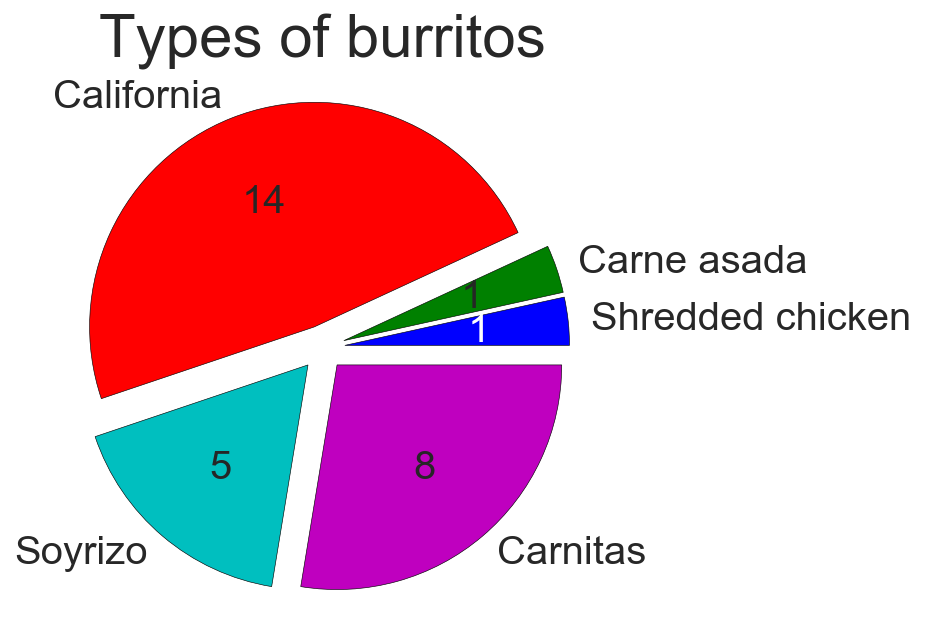

In [62]:
plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.65, 0.65])

# The slices will be ordered and plotted counter-clockwise.
labels = typecounts.keys()
fracs = typecounts.values()
explode=[.1]*len(typecounts)

patches, texts, autotexts = plt.pie(fracs, explode=explode, labels=labels,
                autopct=lambda(p): '{:.0f}'.format(p * np.sum(fracs) / 100), shadow=False, startangle=0)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

plt.title('Types of burritos',size=30)
for t in texts:
    t.set_size(20)
for t in autotexts:
    t.set_size(20)
autotexts[0].set_color('w')

# 2. Hypothesis tests

### California burritos vs. Carnitas burritos

In [66]:
dfCali = df[df.Burrito=='California']
dfCarnitas = df[df.Burrito=='Carnitas']
print sp.stats.ttest_ind(dfCali.overall, dfCarnitas.overall)

Ttest_indResult(statistic=-2.1136889157899783, pvalue=0.0473027579110386)


### Don Carlos 1 vs. Don Carlos 2

In [67]:
dfdc1 = df[df.Location=='Don Carlos 1']
dfdc2 = df[df.Location=='Don Carlos 2']
print sp.stats.ttest_ind(dfdc1.overall, dfdc2.overall)

Ttest_indResult(statistic=nan, pvalue=nan)


### Bonferroni correction

In [77]:
# Compare every dimension for California vs. Carnitas
dims_Cali_v_Carni = df.keys()[5:15]
Ndim = len(dims_Cali_v_Carni)

print 'Measure     p-value'
for d in dims_Cali_v_Carni:
    print d, sp.stats.ttest_ind(dfCali[d].dropna(), dfCarnitas[d].dropna())[1]
print 'Minimum p-value needed for significance:', .05/np.float(Ndim) 

Measure     p-value
Volume 0.351520783633
Tortilla 0.207320986195
Temp 0.895689759545
Meat 0.190059998937
Fillings 0.0127291155058
Meat:filling 0.56627784555
Uniformity 0.461350486955
Salsa 0.161083098233
Synergy 0.259866239715
Wrap 0.822730604223
Minimum p-value needed for significance: 0.005


# 3. Burrito dimension distributions

### Distribution of each burrito quality

In [44]:
import math
def metrichist(metricname):
    if metricname == 'Volume':
        bins = np.arange(.375,1.225,.05)
        xticks = np.arange(.4,1.2,.1)
        xlim = (.4,1.2)
    elif metricname == 'Length':
        bins = np.arange(10,30,1)
        xticks = np.arange(10,30,5)
        xlim = (10,30)
    elif metricname == 'Circum':
        bins = np.arange(10,30,1)
        xticks = np.arange(10,30,5)
        xlim = (10,30)
    else:
        bins = np.arange(-.25,5.5,.5)
        xticks = np.arange(0,5.5,.5)
        xlim = (-.25,5.25)
        
    plt.figure(figsize=(5,5))
    n, _, _ = plt.hist(df[metricname].dropna(),bins,color='k')
    plt.xlabel(metricname + ' rating',size=20)
    plt.xticks(xticks,size=15)
    plt.xlim(xlim)
    plt.ylabel('Count',size=20)
    plt.yticks((0,int(math.ceil(np.max(n) / 5.)) * 5),size=15)
    plt.tight_layout()

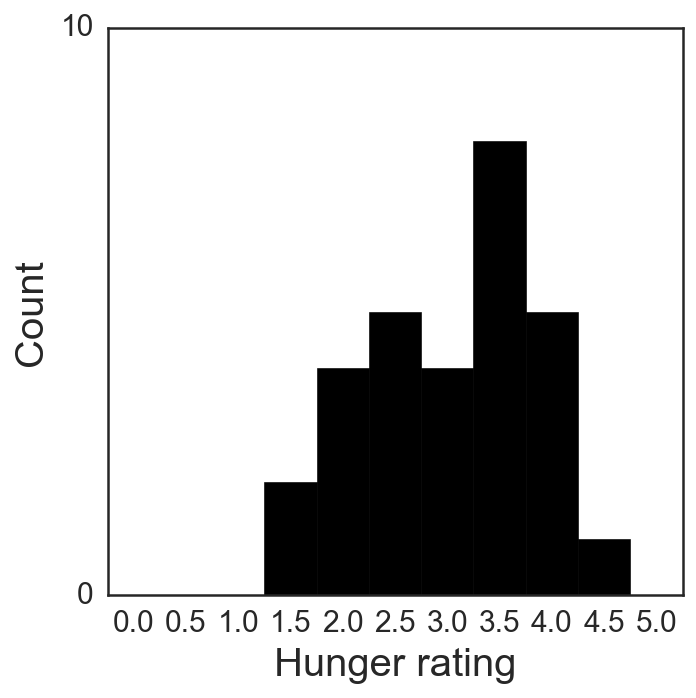

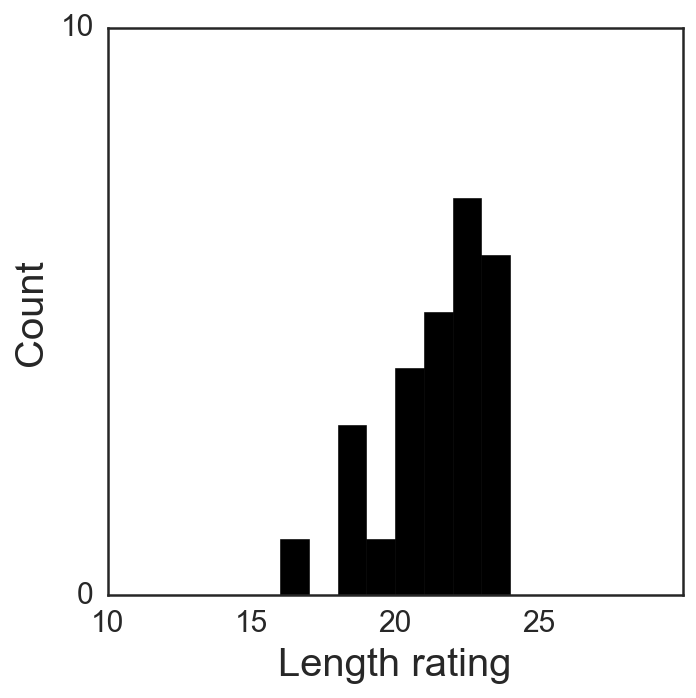

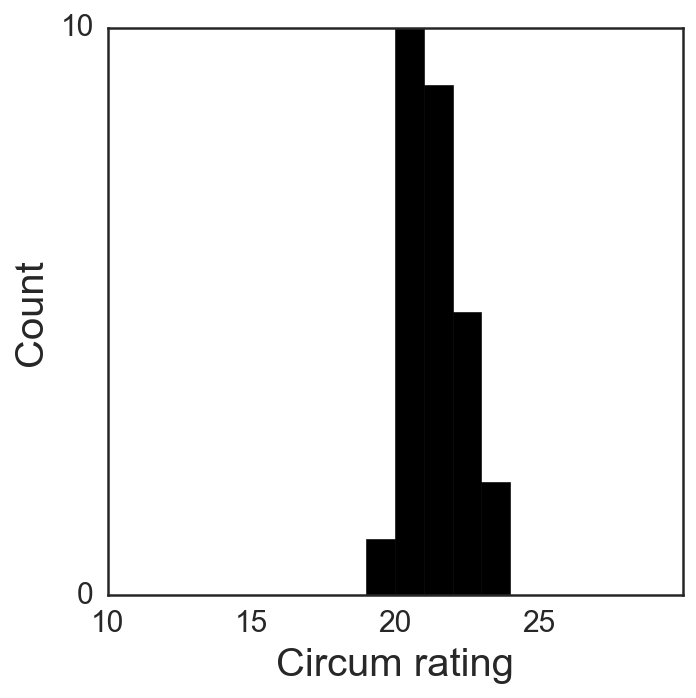

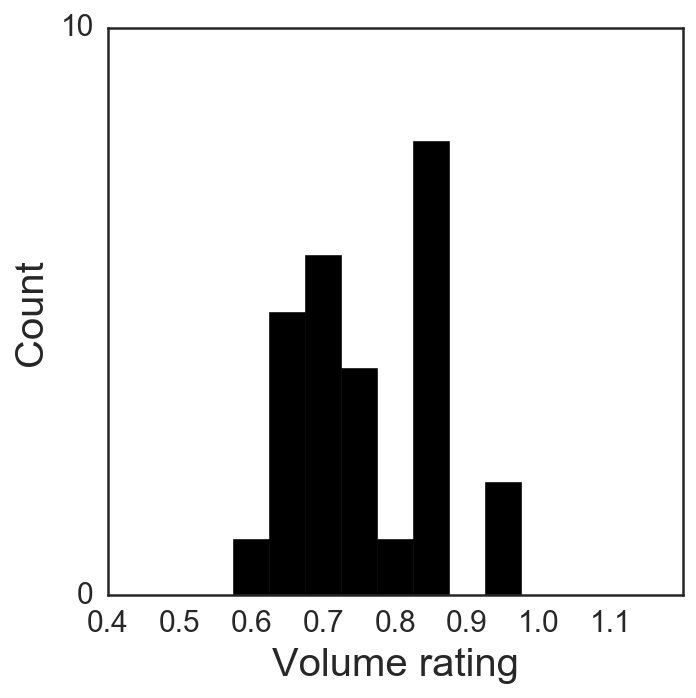

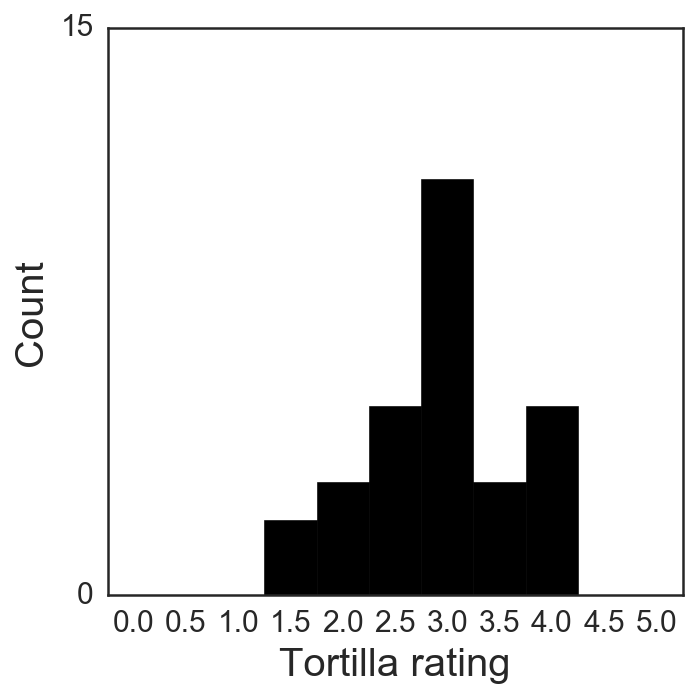

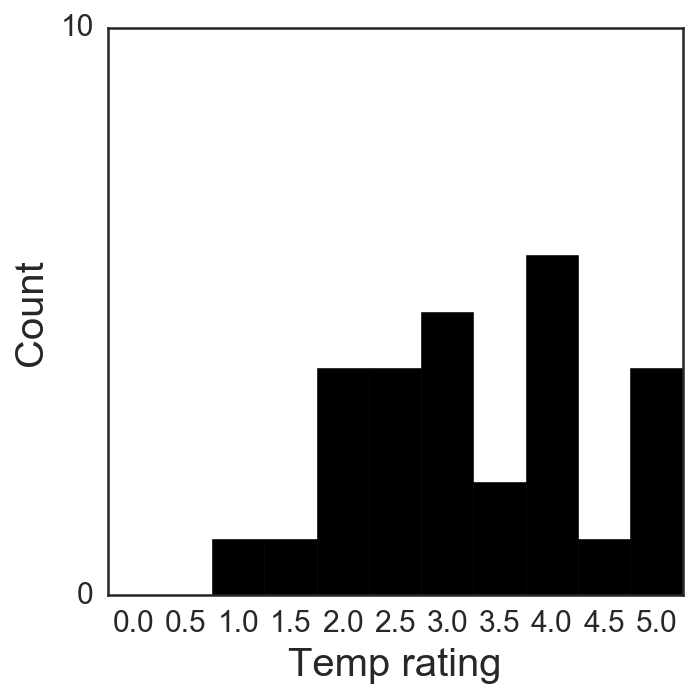

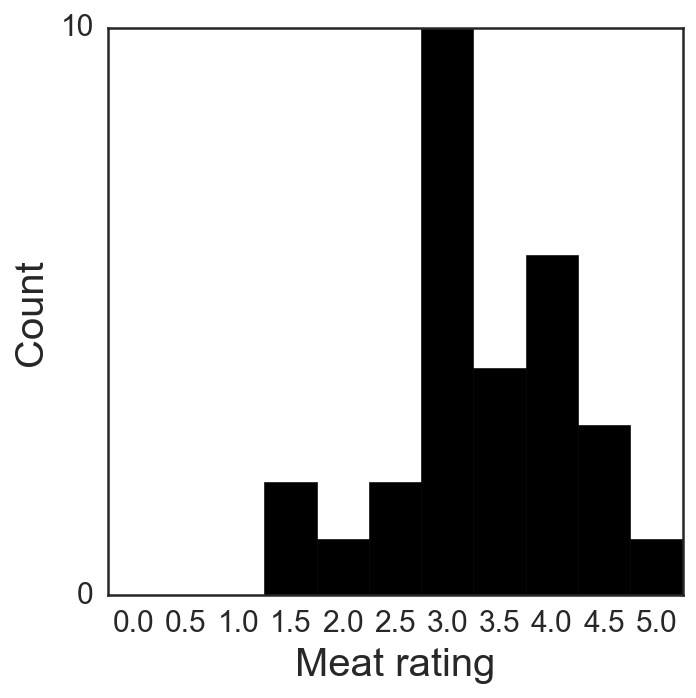

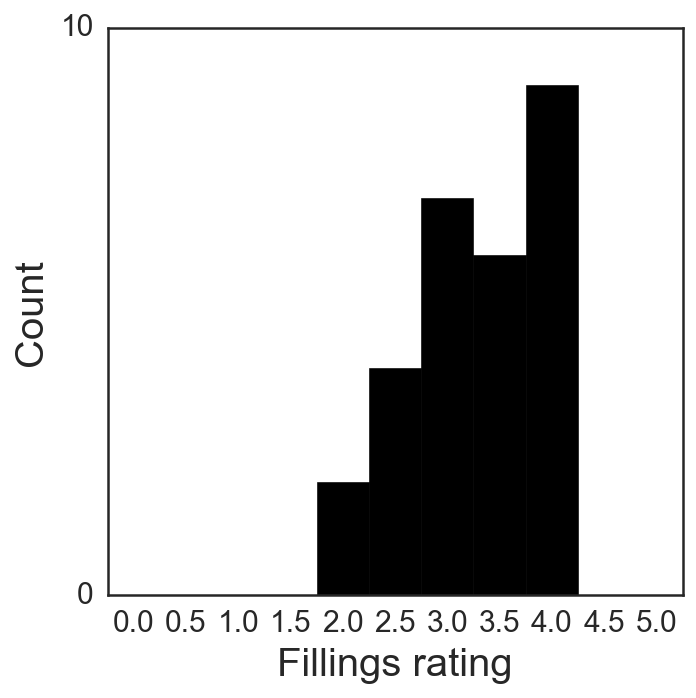

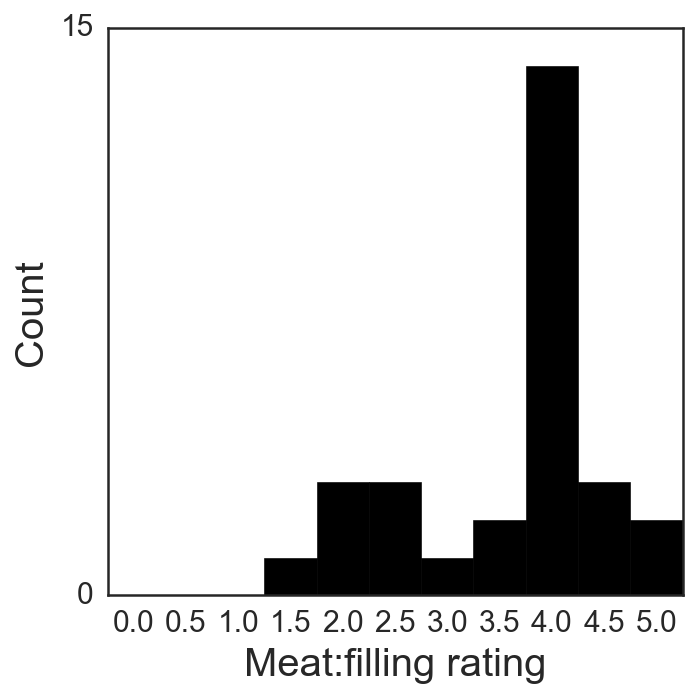

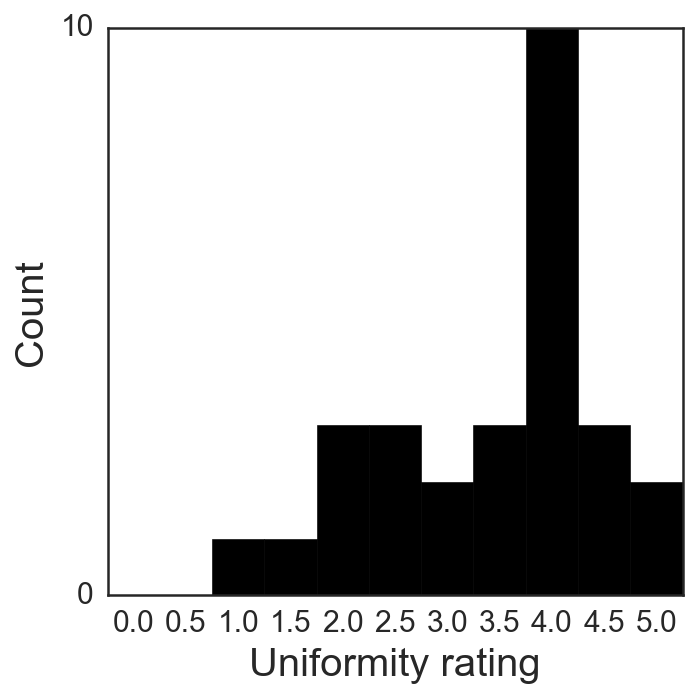

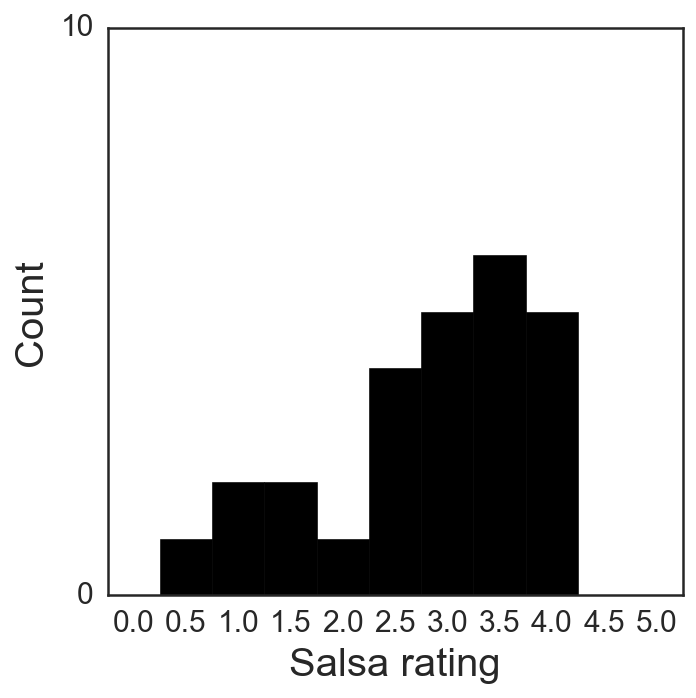

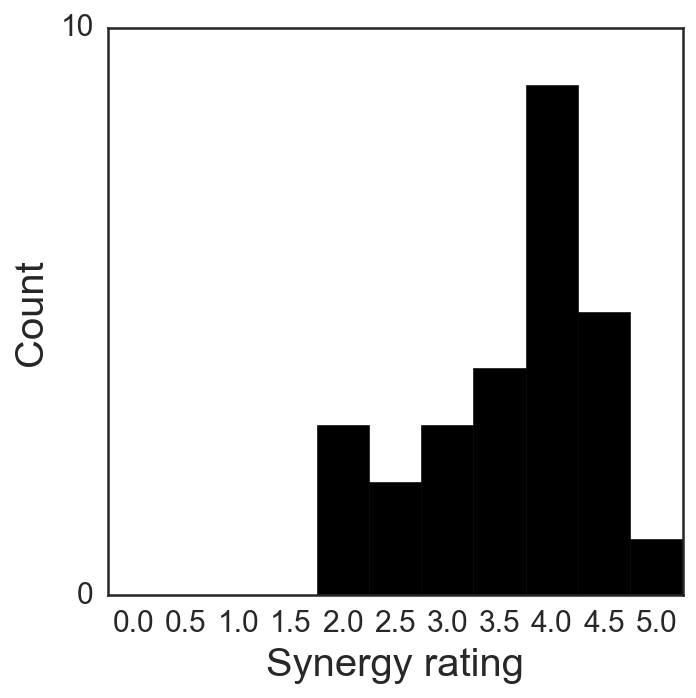

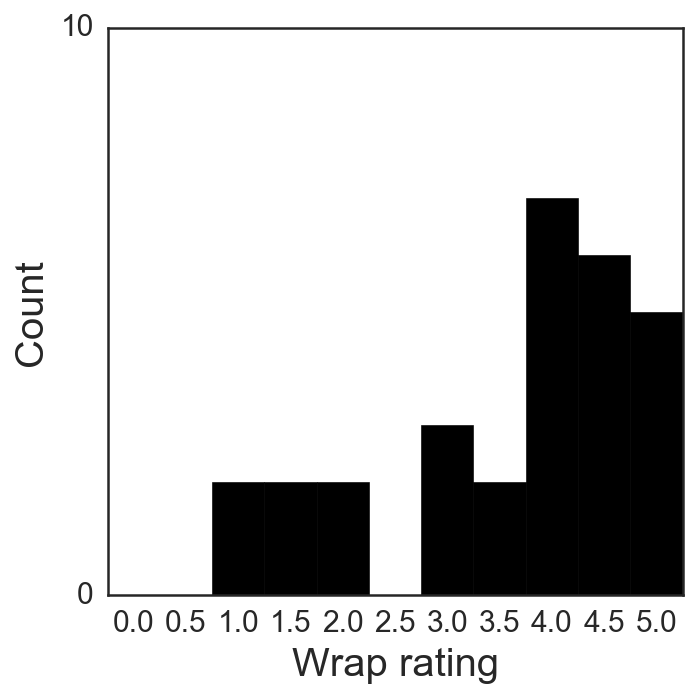

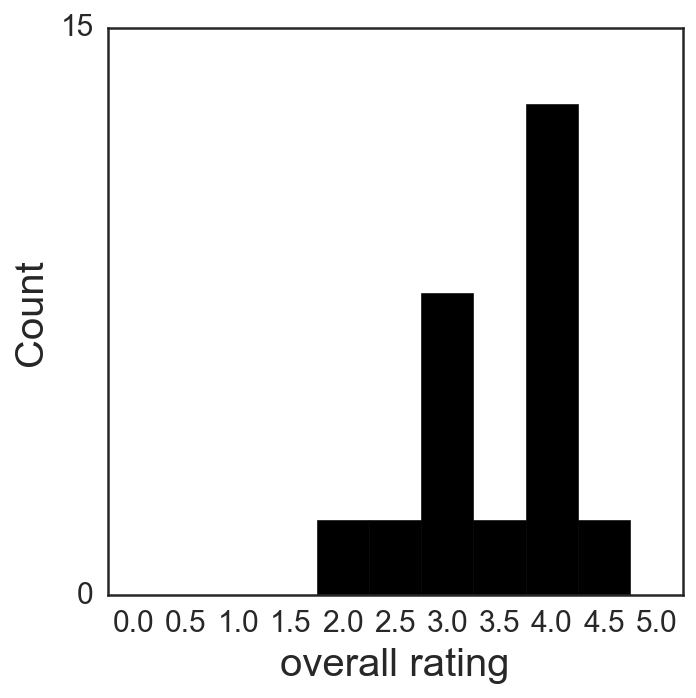

In [45]:
for m in df.keys()[2:-2]:
    metrichist(m)

### Test for normal distribution

Note that even though the distributions don't look very normally distributed, most of them do not reach the p=.05 significance level in order to be rejected as normally distributed. However, a normality assumption may not be reasonable for analyzing this data, and therefore we should use nonparametric tests and measures (like Mann Whitney U or Spearman correlation) as opposed to parametric ones that assume a normal distribution (T-test) or assume a linear relationship (like Pearson correlations)

In [49]:
for m in df.keys()[2:-2]:
    print m, '        Normal test p-value: ', sp.stats.mstats.normaltest(df[m].dropna())[1]

Hunger         Normal test p-value:  0.313039555941
Length         Normal test p-value:  0.0638554296046
Circum         Normal test p-value:  0.857495443844
Volume         Normal test p-value:  0.161935269168
Tortilla         Normal test p-value:  0.83289520022
Temp         Normal test p-value:  0.491918985119
Meat         Normal test p-value:  0.855356099172
Fillings         Normal test p-value:  0.273594468121
Meat:filling         Normal test p-value:  0.177461492667
Uniformity         Normal test p-value:  0.302044946143
Salsa         Normal test p-value:  0.208542447935
Synergy         Normal test p-value:  0.315578066829
Wrap         Normal test p-value:  0.122514175376
overall         Normal test p-value:  0.398340957901


# 4. Correlations

### Hunger vs. overall rating

Pearson correlation coefficient:  0.13435001869
p-value:  0.487160255895


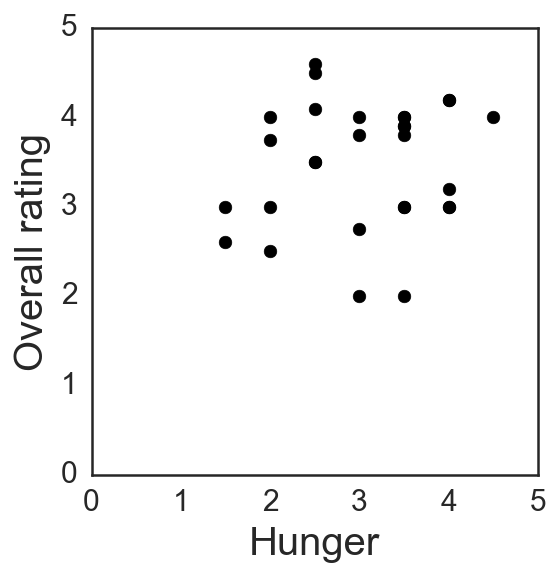

In [31]:
plt.figure(figsize=(4,4))
ax = plt.gca()
df.plot(kind='scatter',x='Hunger',y='overall',ax=ax,**{'s':40,'color':'k'})
plt.xlabel('Hunger',size=20)
plt.ylabel('Overall rating',size=20)
plt.xticks(np.arange(0,6),size=15)
plt.yticks(np.arange(0,6),size=15)


from tools.misc import pearsonp
print 'Pearson correlation coefficient: ', sp.stats.pearsonr(df.Hunger,df.overall)[0]
print 'p-value: ', sp.stats.pearsonr(df.Hunger,df.overall)[1]

### Correlation matrix

In [38]:
dfcorr = df.corr()

(0, 14)

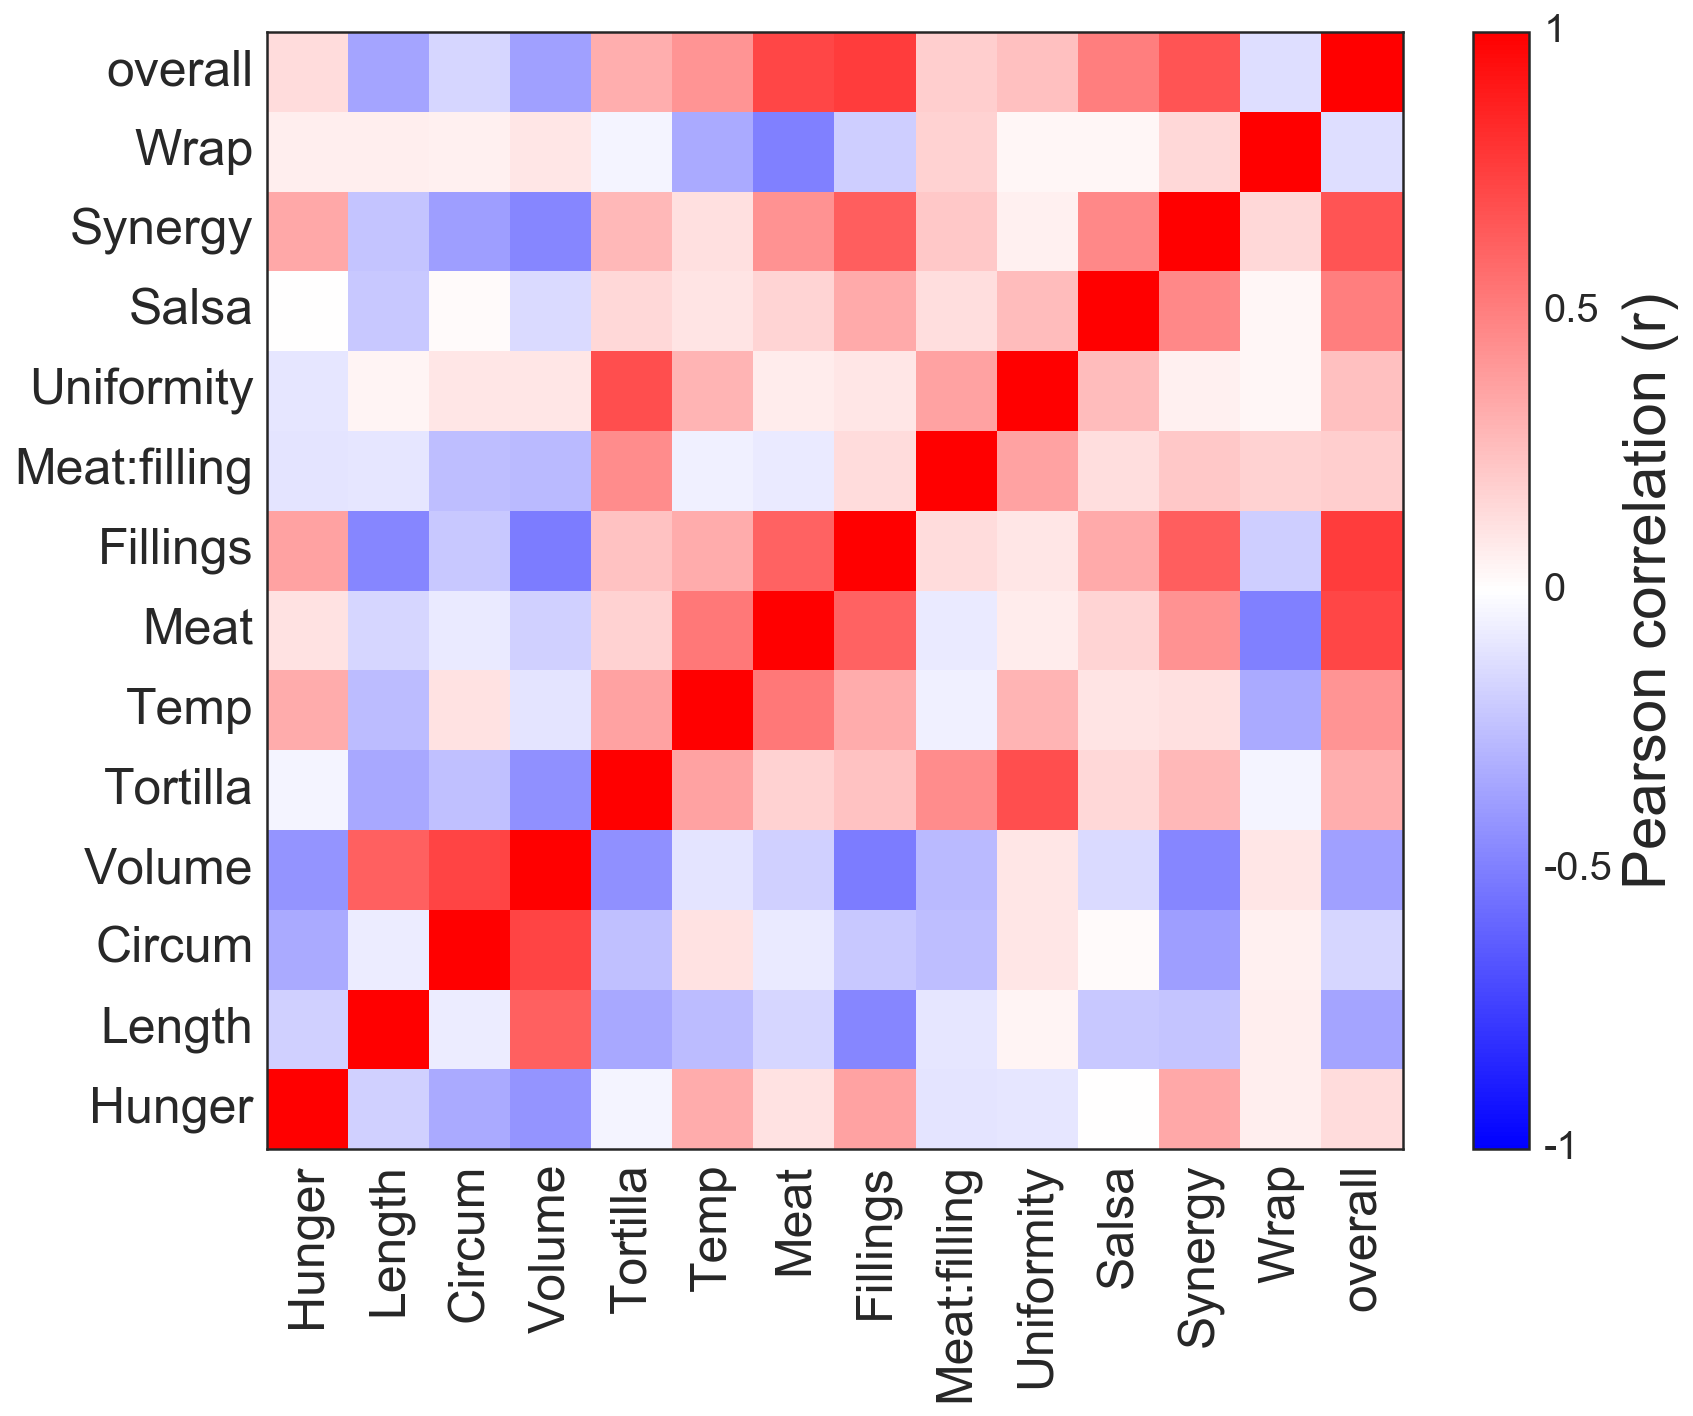

In [37]:
from matplotlib import cm
M = len(dfcorr)
clim1 = (-1,1)

plt.figure(figsize=(12,10))
cax = plt.pcolor(range(M+1), range(M+1), dfcorr, cmap=cm.bwr)
cbar = plt.colorbar(cax, ticks=(-1,-.5,0,.5,1))
cbar.ax.set_ylabel('Pearson correlation (r)', size=30)
plt.clim(clim1)
cbar.ax.set_yticklabels((-1,-.5,0,.5,1),size=20)
ax = plt.gca()
ax.set_yticks(np.arange(M)+.5)
ax.set_yticklabels(dfcorr.keys(),size=25)
ax.set_xticks(np.arange(M)+.5)
ax.set_xticklabels(dfcorr.keys(),size=25)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.xlim((0,M))
plt.ylim((0,M))

# Assumptions

Statistical tests often carry assumptions about how the data was collected and the distribution of values in the data. One very important assumption inherent in most statistical tests is independence of the samples. Naively, we could claim that each sample is independent because each person ate a physically unique burrito.

For example, consider our test for if the California burritos at Don Carlos were better than the Carnitas burritos. For robust independence of samples, we should be consuming each burrito at a random time. This is important in order to make a claim about how the burritos at Don Carlos fare, in general. This independence assumption is violated because all burritos were purchased at the same time. For example, perhaps the pork that Don Carlos bought that week was unusually unfresh. This could have spuriously decreased the ratings of the Carnitas burrito, and our conclusion would likely be False because the sample of pork was not representative of an average Don Carlos burrito.